# ETF Performance Analysis (2004-2024)

## Introduction and Methodology

This notebook analyzes the performance of various Exchange-Traded Funds (ETFs) from 2004 to 2024, using price data obtained from Bloomberg Professional Services. The analysis compares different categories of ETFs to understand their relative performance over this 20-year period.

## Key Calculations

### 1. Cumulative Returns
The cumulative return represents the total percentage change in price since the beginning of the period, normalized to start at 100:

```
Cumulative Return = (Current Price / Initial Price) × 100
```

This shows how much $100 invested at the beginning would be worth today.

### 2. Log Returns
The logarithmic return for each period is calculated as:

```
Log Return = ln(Current Price / Previous Price)
```

The cumulative log return (shown in the right panels) is the sum of all log returns up to a given point. Log returns have mathematical properties that make them more suitable for statistical analysis than simple returns.

## Analysis Steps

1. **Data Preparation**: Extract daily closing prices for each ETF from Bloomberg data
2. **Return Calculation**: Calculate both cumulative returns and log returns for each ETF
3. **Common Timeline**: Find a common starting date where at least 15 ETFs have data
4. **Category Grouping**: Organize ETFs into functional categories:
   - Broad U.S. Market (e.g., SPY, IVV, VTI)
   - Growth-Oriented (e.g., QQQ, VUG, XLK)
   - Mid & Small-Cap (e.g., IJH, IJR, IWM)
   - International (e.g., VEA, VXUS, VWO)
   - Bonds & Gold (e.g., BND, AGG, GLD)
5. **Visualization**: Create dual-panel charts showing cumulative returns and log returns

## Key Insights

The visualization highlights several important patterns:
- Relative performance between different investment categories
- Impact of major market events (2008 crisis, COVID-19 pandemic)
- Long-term growth trajectories of different asset classes
- Volatility differences between sectors

This analysis helps investors understand historical performance patterns and may assist in portfolio construction and asset allocation decisions.

## Cell 1: Setup and Import Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib.lines import Line2D
import seaborn as sns
import datetime
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

# Set plot style
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [15, 20]
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 16

# Print information
print("ETF Analysis setup complete")

ETF Analysis setup complete


## Cell 2: Data Loading and Exploration


In [2]:
# Load the data
df = pd.read_csv('data/Equity ETF(2004-2024)(Sheet1).csv')

# Extract ETF tickers and their column positions
etf_row = df.iloc[2]  # Row with ETF names (3rd row, index 2)
etf_columns = {}

for col in df.columns:
    if isinstance(etf_row[col], str) and 'US Equity' in etf_row[col]:
        ticker = etf_row[col].split(' ')[0]
        etf_columns[ticker] = col

# Define ETF categories based on their types
etf_categories = {
    "Broad U.S. Market": ["SPY", "IVV", "VOO", "VTI", "RSP"],
    "Growth-Oriented": ["QQQ", "VUG", "IWF", "XLK", "VGT"],
    "Mid & Small-Cap": ["VO", "IJH", "IJR", "IWM"],
    "International": ["VEA", "VXUS", "IEFA", "VWO", "IEMG"],
    "Bonds & Gold": ["BND", "AGG", "GLD", "VTV", "SCHD"]
}

# Filter for rows with actual price data (starting from row 5)
date_rows = df.iloc[5:].copy()
date_rows = date_rows[date_rows['Start Date'].notna()]

# Print summary information
print(f"Data shape: {df.shape}")
print(f"Found {len(etf_columns)} ETF tickers in the data")
print(f"ETFs: {list(etf_columns.keys())}")
print(f"Found {len(date_rows)} rows with date data")

# Display first few rows to understand structure
df.head(5)

Data shape: (5245, 126)
Found 25 ETF tickers in the data
ETFs: ['SPY', 'IVV', 'VOO', 'VTI', 'QQQ', 'VUG', 'VEA', 'VTV', 'BND', 'AGG', 'IEFA', 'IWF', 'IJH', 'IJR', 'VIGI', 'VGT', 'VWO', 'IEMG', 'IWM', 'XLK', 'VXUS', 'VO', 'GLD', 'RSP', 'SCHD']
Found 5240 rows with date data


,Start Date,12/1/2004,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125
0,End Date,12/31/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,SPY US Equity,NaN,NaN,NaN,NaN,IVV US Equity,NaN,NaN,NaN,...,RSP US Equity,NaN,NaN,NaN,NaN,SCHD US Equity,NaN,NaN,NaN,NaN
3,NaN,Open Price,High Price,Low Price,Last Price,Volume,Open Price,High Price,Low Price,Last Price,...,Open Price,High Price,Low Price,Last Price,Volume,Open Price,High Price,Low Price,Last Price,Volume
4,Dates,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,...,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME


## Cell 3: Data Processing Functions


In [3]:
def get_etf_data(ticker, etf_columns, date_rows, df):
    """
    Extract price data for an ETF and calculate returns
    
    Parameters:
    -----------
    ticker : str
        ETF ticker symbol
    etf_columns : dict
        Mapping of tickers to their column positions
    date_rows : DataFrame
        Filtered DataFrame containing rows with dates
    df : DataFrame
        Original DataFrame with all data
        
    Returns:
    --------
    DataFrame
        Processed data with dates, prices, and calculated returns
    """
    if ticker not in etf_columns:
        print(f"Warning: {ticker} not found in data")
        return None
    
    col = etf_columns[ticker]
    
    # Find the 4th column after the main column (the "Last Price" column)
    last_price_col = df.columns[df.columns.get_loc(col) + 3]
    
    # Extract dates and closing prices
    data = date_rows[['Start Date', last_price_col]].copy()
    data.columns = ['Date', 'Price']
    
    # Convert to numeric, handle non-numeric values
    data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
    
    # Drop rows with missing prices
    data = data.dropna()
    
    # Convert date to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Calculate cumulative return (starting from 100)
    if len(data) > 0:
        initial_price = data['Price'].iloc[0]
        data['CumulativeReturn'] = (data['Price'] / initial_price) * 100
        
        # Calculate log returns - using proper pandas assignment
        data['LogReturn'] = np.log(data['Price'] / data['Price'].shift(1))
        data.loc[data.index[0], 'LogReturn'] = 0  # Set first value to 0
    
    return data


def process_all_etfs(etf_columns, date_rows, df):
    """
    Process all ETFs and find common start date
    
    Parameters:
    -----------
    etf_columns : dict
        Mapping of tickers to their column positions
    date_rows : DataFrame
        Filtered DataFrame containing rows with dates
    df : DataFrame
        Original DataFrame with all data
        
    Returns:
    --------
    dict
        Dictionary containing processed data for each ETF
    """
    # Process each ETF and store in a dictionary
    etf_data = {}
    for ticker in etf_columns.keys():
        data = get_etf_data(ticker, etf_columns, date_rows, df)
        if data is not None and len(data) > 0:
            etf_data[ticker] = data
    
    # Check data availability for each ETF
    etf_start_dates = {}
    for ticker, data in etf_data.items():
        etf_start_dates[ticker] = data['Date'].min()
    
    # Find a common date range where most ETFs are available
    dates_list = sorted(list(set([date for ticker in etf_data for date in etf_data[ticker]['Date']])))
    etfs_per_date = {}
    for date in dates_list:
        etfs_per_date[date] = [ticker for ticker, data in etf_data.items() 
                              if date in data['Date'].values]
    
    # Find a date where at least 15 ETFs are available
    common_start_date = None
    for date in sorted(etfs_per_date.keys()):
        if len(etfs_per_date[date]) >= 15:
            common_start_date = date
            break
    
    if common_start_date:
        print(f"\nCommon start date: {common_start_date.strftime('%Y-%m-%d')} with {len(etfs_per_date[common_start_date])} ETFs available")
        
        # Filter data to start from the common date and recalculate returns
        for ticker in etf_data:
            # Filter data
            etf_data[ticker] = etf_data[ticker][etf_data[ticker]['Date'] >= common_start_date].copy()
            
            # Recalculate cumulative returns from common start date
            if len(etf_data[ticker]) > 0:
                initial_price = etf_data[ticker]['Price'].iloc[0]
                etf_data[ticker]['CumulativeReturn'] = (etf_data[ticker]['Price'] / initial_price) * 100
                
                # Recalculate log returns using proper pandas assignment
                etf_data[ticker]['LogReturn'] = np.log(etf_data[ticker]['Price'] / etf_data[ticker]['Price'].shift(1))
                etf_data[ticker].loc[etf_data[ticker].index[0], 'LogReturn'] = 0
    
    return etf_data

# Process all ETFs
etf_data = process_all_etfs(etf_columns, date_rows, df)
print(f"Processed {len(etf_data)} ETFs with valid data")

# Display sample data
print("\nSample data for SPY:")
print(etf_data['SPY'].head())


Common start date: 2004-12-01 with 16 ETFs available
Processed 25 ETFs with valid data

Sample data for SPY:
        Date   Price  CumulativeReturn  LogReturn
5 2004-12-01  119.23        100.000000   0.000000
6 2004-12-02  119.33        100.083872   0.000838
7 2004-12-03  119.25        100.016774  -0.000671
8 2004-12-06  119.21         99.983226  -0.000335
9 2004-12-07  118.10         99.052252  -0.009355


## Cell 4: Visualization Configuration


In [4]:
# Define visual styling parameters

# ETF color scheme
colors = {
    # Broad Market
    "SPY": "#1f77b4",    # Blue
    "IVV": "#2ca02c",    # Green
    "VOO": "#d62728",    # Red
    "VTI": "#ff7f0e",    # Orange
    "RSP": "#9467bd",    # Purple
    
    # Growth
    "QQQ": "#1f77b4",    # Blue
    "VUG": "#d62728",    # Red
    "IWF": "#2ca02c",    # Green
    "XLK": "#17becf",    # Cyan
    "VGT": "#ff7f0e",    # Orange
    
    # Mid/Small Cap
    "VO": "#1f77b4",     # Blue
    "IJH": "#2ca02c",    # Green
    "IJR": "#d62728",    # Red
    "IWM": "#ff7f0e",    # Orange
    
    # International
    "VEA": "#1f77b4",    # Blue
    "VXUS": "#2ca02c",   # Green
    "IEFA": "#d62728",   # Red
    "VWO": "#ff7f0e",    # Orange
    "IEMG": "#9467bd",   # Purple
    
    # Fixed Income & Value
    "BND": "#1f77b4",    # Blue
    "AGG": "#2ca02c",    # Green
    "GLD": "#d62728",    # Red
    "VTV": "#ff7f0e",    # Orange
    "SCHD": "#9467bd"    # Purple
}

# Define line styles for better differentiation
line_styles = {
    "SPY": "-", 
    "IVV": "--", 
    "VOO": "-.", 
    "VTI": ":", 
    "RSP": "-",
    
    "QQQ": "-", 
    "VUG": "--", 
    "IWF": "-.", 
    "XLK": ":", 
    "VGT": "-",
    
    "VO": "-", 
    "IJH": "--", 
    "IJR": "-.", 
    "IWM": ":",
    
    "VEA": "-", 
    "VXUS": "--", 
    "IEFA": "-.", 
    "VWO": ":", 
    "IEMG": "-",
    
    "BND": "-", 
    "AGG": "--", 
    "GLD": "-.", 
    "VTV": ":", 
    "SCHD": "-"
}

# Define line weights for further differentiation
line_weights = {
    "SPY": 2.0, "QQQ": 2.0, "VO": 2.0, "VEA": 2.0, "BND": 2.0,
    "IVV": 1.8, "VUG": 1.8, "IJH": 1.8, "VXUS": 1.8, "AGG": 1.8,
    "VOO": 1.5, "IWF": 1.5, "IJR": 1.5, "IEFA": 1.5, "GLD": 1.5,
    "VTI": 1.3, "XLK": 1.3, "IWM": 1.3, "VWO": 1.3, "VTV": 1.3,
    "RSP": 1.2, "VGT": 1.2, "IEMG": 1.2, "SCHD": 1.2
}

# Define y-axis limits for each category
y_limits = {
    'Broad U.S. Market': {'left': (0, 600), 'right': (-0.5, 1.8)},
    'Growth-Oriented': {'left': (0, 1400), 'right': (-0.5, 2.5)},
    'Mid & Small-Cap': {'left': (0, 600), 'right': (-0.5, 1.8)},
    'International': {'left': (0, 250), 'right': (-0.8, 0.8)},
    'Bonds & Gold': {'left': (0, 600), 'right': (-0.5, 1.8)}
}

# Helper functions for plotting

def create_custom_legend(ax, tickers, colors, line_styles, line_weights):
    """Create a well-formatted legend that doesn't overlap with data"""
    handles = []
    labels = []
    
    for ticker in tickers:
        if ticker in etf_data:
            line = Line2D([0], [0], 
                         color=colors.get(ticker, '#333333'),
                         linestyle=line_styles.get(ticker, '-'),
                         linewidth=line_weights.get(ticker, 1.5),
                         label=ticker)
            handles.append(line)
            labels.append(ticker)
    
    # Position legend based on column
    if ax.get_subplotspec().is_last_col():
        # Right column - legend to the right
        legend = ax.legend(handles, labels, loc='center left', 
                         bbox_to_anchor=(1.01, 0.5), fontsize=9,
                         frameon=True, framealpha=0.8, edgecolor='#cccccc')
    else:
        # Left column - legend in upper left
        legend = ax.legend(handles, labels, loc='upper left', 
                         fontsize=9, frameon=True, framealpha=0.8,
                         edgecolor='#cccccc')
    
    # Add styling for better visibility
    legend.get_frame().set_boxstyle('round,pad=0.3')
    legend.get_frame().set_linewidth(0.5)
    
    return legend


def plot_category(ax_left, ax_right, category_name, etfs_list, etf_data, colors, line_styles, line_weights):
    """Plot cumulative returns and log returns for a category of ETFs"""
    # Plot cumulative returns (left)
    for ticker in etfs_list:
        if ticker in etf_data:
            data = etf_data[ticker]
            ax_left.plot(
                data['Date'], 
                data['CumulativeReturn'], 
                color=colors.get(ticker, '#333333'),
                linestyle=line_styles.get(ticker, '-'),
                linewidth=line_weights.get(ticker, 1.5),
                label=ticker
            )
    
    # Format left plot (cumulative returns)
    ax_left.set_title(category_name, fontsize=14, fontweight='bold')
    ax_left.grid(True, alpha=0.3, linestyle='--')
    ax_left.set_ylabel('Cumulative Return ($)', fontsize=12)
    
    # Format y-axis with dollar sign
    ax_left.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
    
    # Remove top and right spines
    ax_left.spines['right'].set_visible(False)
    ax_left.spines['top'].set_visible(False)
    
    # Only show x labels on bottom plots
    if category_name in ["Bonds & Gold", "International"]:
        ax_left.set_xlabel('Year', fontsize=12)
    
    # Plot log returns (right)
    for ticker in etfs_list:
        if ticker in etf_data:
            data = etf_data[ticker]
            ax_right.plot(
                data['Date'], 
                data['LogReturn'].cumsum(),  
                color=colors.get(ticker, '#333333'),
                linestyle=line_styles.get(ticker, '-'),
                linewidth=line_weights.get(ticker, 1.5),
                label=ticker
            )
    
    # Format right plot (log returns)
    ax_right.set_title(category_name, fontsize=14, fontweight='bold')
    ax_right.grid(True, alpha=0.3, linestyle='--')
    ax_right.set_ylabel('Cumulative Log Return', fontsize=12)
    
    # Remove top and right spines
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['top'].set_visible(False)
    
    # Only show x labels on bottom plots
    if category_name in ["Bonds & Gold", "International"]:
        ax_right.set_xlabel('Year', fontsize=12)
    
    # Add custom legends
    create_custom_legend(ax_left, etfs_list, colors, line_styles, line_weights)
    create_custom_legend(ax_right, etfs_list, colors, line_styles, line_weights)

# Print configuration information
print("Visualization configuration complete")


Visualization configuration complete


## Cell 5: Generate Plots


C:\Users\Akash\AppData\Local\Temp\ipykernel_14612\3903046466.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.02, 0.98, 0.88])


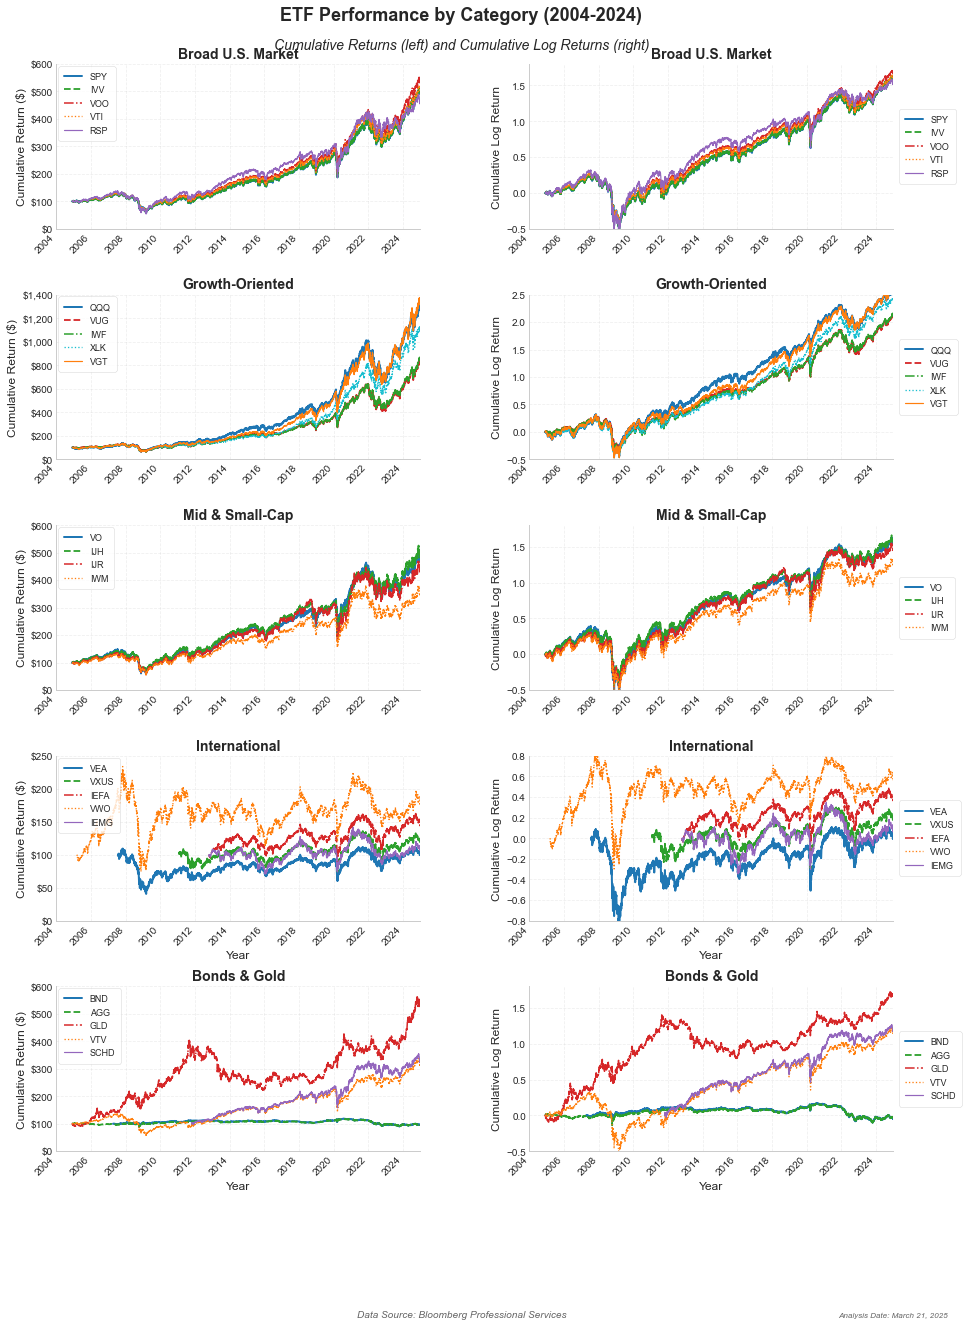

In [5]:
# Create figure with professional styling
fig = plt.figure(figsize=(15, 20))

# Set up subplot grid with optimized spacing
gs = fig.add_gridspec(5, 2, hspace=0.4, wspace=0.3)

# List of categories to plot
categories = ['Broad U.S. Market', 'Growth-Oriented', 'Mid & Small-Cap', 'International', 'Bonds & Gold']

# Create plots for each category
for i, category in enumerate(categories):
    # Create subplots
    ax_left = fig.add_subplot(gs[i, 0])  # Left column
    ax_right = fig.add_subplot(gs[i, 1])  # Right column
    
    # Plot the category data
    plot_category(
        ax_left, ax_right, 
        category, etf_categories[category], 
        etf_data, colors, line_styles, line_weights
    )
    
    # Format the dates on x-axis
    years = mdates.YearLocator(2)   # Show every 2 years
    years_fmt = mdates.DateFormatter('%Y')
    
    for ax in [ax_left, ax_right]:
        ax.xaxis.set_major_locator(years)
        ax.xaxis.set_major_formatter(years_fmt)
        ax.set_xlim(pd.Timestamp('2004-01-01'), pd.Timestamp('2024-12-31'))
        # Rotate date labels for better readability
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Set y-axis limits based on category
    y_left_limits = y_limits[category]['left']
    y_right_limits = y_limits[category]['right']
    
    ax_left.set_ylim(y_left_limits)
    ax_right.set_ylim(y_right_limits)

# Add main title and subtitle
fig.suptitle('ETF Performance by Category (2004-2024)', fontsize=18, y=0.92, fontweight='bold')
plt.figtext(0.5, 0.89, 'Cumulative Returns (left) and Cumulative Log Returns (right)', 
           ha='center', fontsize=14, fontstyle='italic')

# Add data attribution and metadata
plt.figtext(0.5, 0.01, 'Data Source: Bloomberg Professional Services', 
           ha='center', fontsize=10, fontstyle='italic', color='#666666')

today = datetime.datetime.now().strftime("%B %d, %Y")
plt.figtext(0.95, 0.01, f'Analysis Date: {today}', 
           ha='right', fontsize=8, fontstyle='italic', color='#666666')

# Adjust layout and save
plt.tight_layout(rect=[0, 0.02, 0.98, 0.88])
plt.savefig('etf_performance_professional.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()